**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

# 1、成功读取BTCUSDT:binance的数据，绘出30Min和1H的gap图

'start_date':20180601000000

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService(None)
from time import time
## 加freq参数

start = time()
path = r'../min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',\
         'symbol': 'BTCUSDT:binance',
         'freq': '30Min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

15.710898399353027


In [1]:
#调用模块
from jaqs_fxdayu.data.hf_dataview import HFDataView

dv30M = HFDataView()
dv1H = HFDataView()

In [4]:
dv30M.create_init_dv(Time_dict['30Min'].dropna().set_index(["trade_date","symbol"]))
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))

Initialize dataview success.
Initialize dataview success.


In [8]:
Gap30 = dv30M.add_formula('gap', 'close-Delay(open, 1)',add_data=True)
Gap1H = dv1H.add_formula('gap', 'close-Delay(open, 1)',add_data=True)

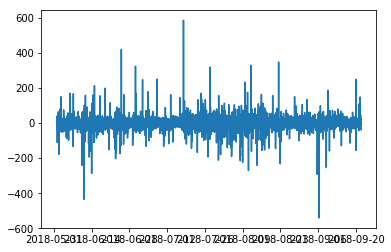

In [9]:
#观察价差
import matplotlib.pyplot as plt


plt.plot(dv30M.get_ts('gap', date_type='datetime')['BTCUSDT:binance'])
plt.show()

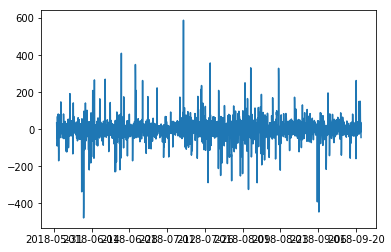

In [31]:
#1H的图 观察价差
import matplotlib.pyplot as plt


plt.plot(dv1H.get_ts('gap', date_type='datetime')['BTCUSDT:binance'])
plt.show()

In [39]:
dv1H.get_ts('gap', date_type='datetime').stack()

trade_date           symbol         
2018-06-01 01:00:00  BTCUSDT:binance     34.94
2018-06-01 02:00:00  BTCUSDT:binance      5.10
2018-06-01 03:00:00  BTCUSDT:binance    -44.64
2018-06-01 04:00:00  BTCUSDT:binance    -17.05
2018-06-01 05:00:00  BTCUSDT:binance     10.04
2018-06-01 06:00:00  BTCUSDT:binance    -90.77
2018-06-01 07:00:00  BTCUSDT:binance    -69.93
2018-06-01 08:00:00  BTCUSDT:binance     68.58
2018-06-01 09:00:00  BTCUSDT:binance     -1.02
2018-06-01 10:00:00  BTCUSDT:binance    -27.21
2018-06-01 11:00:00  BTCUSDT:binance     11.14
2018-06-01 12:00:00  BTCUSDT:binance      3.40
2018-06-01 13:00:00  BTCUSDT:binance     -5.13
2018-06-01 14:00:00  BTCUSDT:binance     50.67
2018-06-01 15:00:00  BTCUSDT:binance     82.09
2018-06-01 16:00:00  BTCUSDT:binance     52.00
2018-06-01 17:00:00  BTCUSDT:binance    -40.45
2018-06-01 18:00:00  BTCUSDT:binance    -55.05
2018-06-01 19:00:00  BTCUSDT:binance   -170.53
2018-06-01 20:00:00  BTCUSDT:binance   -121.97
2018-06-01 21:00:00  BT

# 2、调用alpha101research中的alpha10进行绘图，定义事件，打印绩效

要求：

1、绘出alpha10_dv30M_ma5_ma20、alpha10_dv1H_ma5_ma20的图。

2、定义alpha10的金叉死叉事件，周期为20和55，并打印出long_short的绩效

In [41]:
# for dvAdd in [dv30M, dv1H]:
#     dvAdd.add_formula('alpha1_C','Ts_Argmax(SignedPower(If(Return(close,1)<0, StdDev(Return(close,1),20),close),2),5)',add_data=True)
# return 计算指标相比n天前的变化率，默认计算百分比变化率；当log为1时，计算对数变化率;为0时计算普通变化率	 Return(x,n,log)	
# 指标在过去n天的标准差	StdDev(x,n)	
# cond为True取x的值，反之取y的值	 If(cond,x,y)	
# 保持符号的幂函数，等价于Sign(x) * (Abs(x)^e)	SignedPower(x,e)	
# 计算指标在过去n天最大值的坐标	Ts_Argmax

E:\anaconda\envs\tensorflow\lib\site-packages\jaqs\data\py_expression_eval.py:486: RuntimeWarning: invalid value encountered in less
  res = arr < brr
E:\anaconda\envs\tensorflow\lib\site-packages\jaqs\data\py_expression_eval.py:434: RuntimeWarning: invalid value encountered in sign
  signs = np.sign(x)


In [11]:
for dvAdd in [dv30M, dv1H]:
    dvAdd.add_formula('alpha10_C','If(Ts_Min(Delta(close,1),4)>0,Delta(close,1),If((Ts_Max(Delta(close,1),4)<0),Delta(close,1),(-1*Delta(close,1))))',add_data=True)

In [9]:
import matplotlib.pyplot as plt

def Plot_Mean(dv, alpha, chart_name='dv_alpha_ma', ShortPeriod=5, LongPeriod=20, n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(alpha.iloc[n:], alpha=0.1)
    ax1.plot(pd.Series(alpha.rolling(ShortPeriod).mean(), index=alpha.index).iloc[n:])
    ax1.plot(pd.Series(alpha.rolling(LongPeriod).mean(), index=alpha.index).iloc[n:])
#     plt.savefig(chart_name)
    plt.show()

In [13]:
dv_dict = {'alpha1_dv30M':dv30M, 'alpha1_dv1H':dv1H}
alpha1_dict = {n: dv.get_ts('alpha10_C', date_type='datetime') for n, dv in dv_dict.items()}

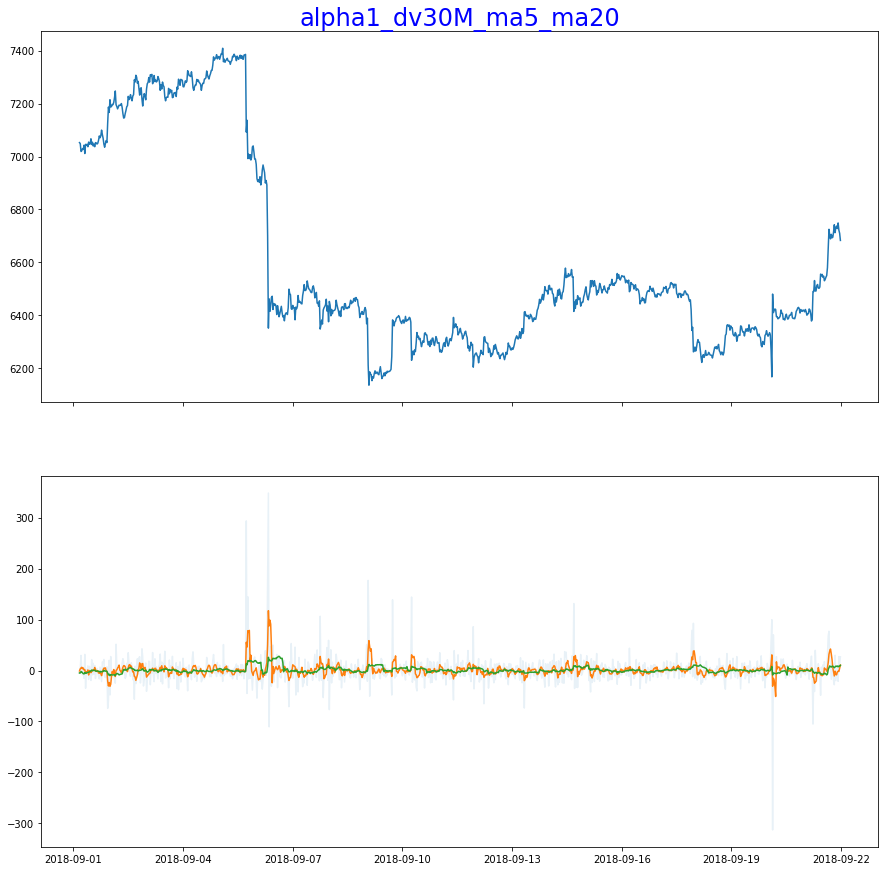

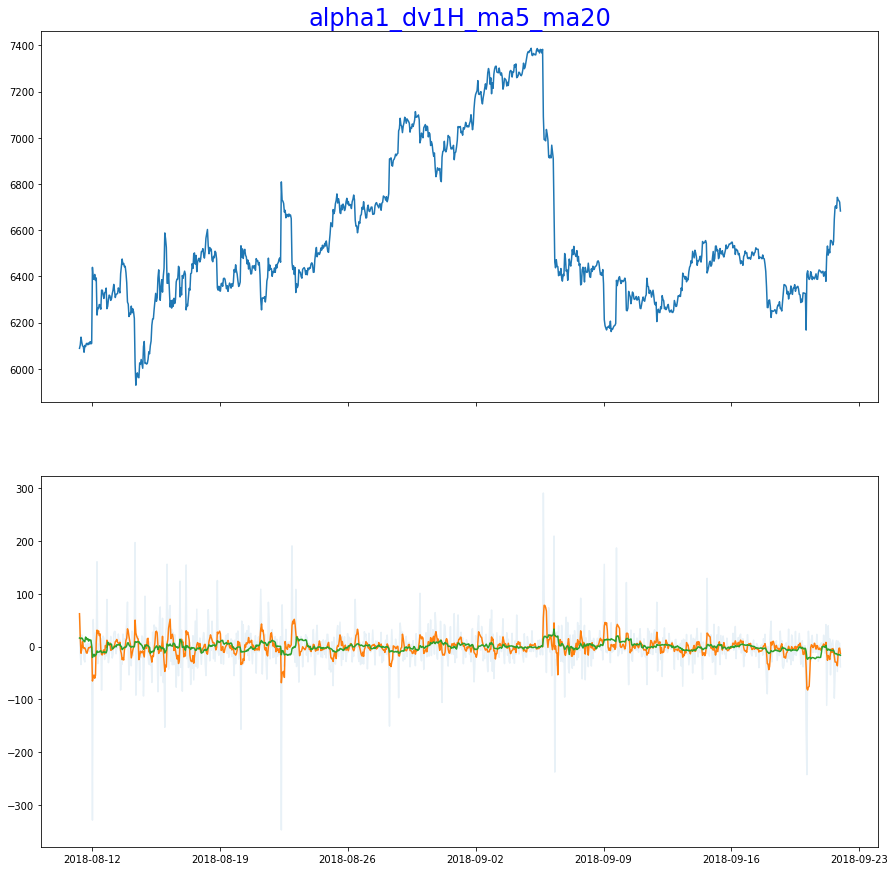

In [14]:
import pandas as pd

for name, alpha in alpha1_dict.items():
    Plot_Mean(globals()[name.split('_')[1]], alpha.iloc[:,0], chart_name=name+'_ma5_ma20',ShortPeriod=5, LongPeriod=20, n=-1000)#橘色短线 绿色长线
    #[name.split('_')[1]]取出dv30M和dv1HM

In [17]:
# 进场信号
long = dv1H.add_formula("longAlpha1","If((Ts_Mean(alpha10_C,20)>Ts_Mean(alpha10_C,55)) && (Delay(Ts_Mean(alpha10_C,20),1)<=Delay(Ts_Mean(alpha10_C,55),1)),2,0)", add_data=True)
short = dv1H.add_formula("shortAlpha1","If((Ts_Mean(alpha10_C,20)<Ts_Mean(alpha10_C,55)) && (Delay(Ts_Mean(alpha10_C,20),1)>=Delay(Ts_Mean(alpha10_C,55),1)),-2,0)", add_data=True)

# 出场信号
close_long = dv1H.add_formula("closeLongAlpha1","If(shortAlpha1==-2,1,0)", add_data=True)
close_short = dv1H.add_formula("closeShortAlpha1","If(longAlpha1==2,-1,0)", add_data=True)

In [18]:
dv1H.get_ts('longAlpha1').stack()[dv1H.get_ts('longAlpha1').stack()==2].tail()

trade_date      symbol         
20180919050000  BTCUSDT:binance    2.0
20180919080000  BTCUSDT:binance    2.0
20180919110000  BTCUSDT:binance    2.0
20180919160000  BTCUSDT:binance    2.0
20180920230000  BTCUSDT:binance    2.0
dtype: float64

In [29]:
#通过测试报告，看多空信号的绩效，这里是定义报告格式
from jaqs_fxdayu.research import TimingDigger

tdMa = TimingDigger(output_folder=".", output_format='pdf',signal_name='Ma')

def TimingSignal(td, dv, long='long', short='short',closeLong='closeLong', closeShort='closeShort'\
                 , mhp=None,sl=None,sp=None):
    # step 1：实例化TimingDigger 通过output_folder和output_format指定测试报告的输出路径和输出格式，通过signal_name指定绩效文件名称

    #多空信号分别计算一遍 输出汇总结果
    td.process_signal(
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        sig_type="long",  # 信号类型 long/short
        price=dv.get_ts('close'),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

    td.process_signal(
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        sig_type="short",  # 信号类型 long/short
        price=dv.get_ts("close"),
        max_holding_period=mhp,  # 最大持有天数 可为空
        stoploss=-sl,  # 止损百分比 负数 可为空
        stopprofit=sp,  # 止盈百分比 正数 可为空
    )

In [34]:
from jaqs_fxdayu.research import TimingDigger

tdAlpha10 = TimingDigger(output_folder=".", output_format='pdf',signal_name='Alpha')

TimingSignal(tdAlpha10, dv1H,'longAlpha1','shortAlpha1','closeLongAlpha1','closeShortAlpha1', 100, 0.05, 0.3)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 6%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 6%


In [35]:
tdAlpha10.create_event_report(sig_type="long_short") #同时计算多空头信号的绩效

*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat                8.290   -9.095   -0.145
p-value               0.000    0.000    0.885
mean                  0.011   -0.011   -0.000
std                   0.016    0.015    0.019
info_ratio            0.677   -0.738   -0.008
skewness              3.664   -1.974    0.697
kurtosis             17.554    2.909    8.470
pct5                  0.001   -0.049   -0.032
pct25                 0.002   -0.012   -0.005
pct50                 0.005   -0.005   -0.000
pct75                 0.012   -0.002    0.005
pct95                 0.041   -0.001    0.027
occurance           151.000  153.000  304.000
win_ratio               NaN      NaN    0.497
win_mean/loss_mean      NaN      NaN    0.984


# 3、打印出Morningstar事件的时间点，绘出Morningstar与成交量的图

数据类型要求：'symbol': 'BTCUSDT:binance',

'freq': '1H','start_date':20180601000000

In [37]:
dv1H.add_formula('Morningstar', "If((Ta('CDLMORNINGSTAR', 0, open, high, low, close, volume)==100),100,0)", add_data=True)
Morningstar = dv1H.get_ts('Morningstar', date_type='datetime')
Morningstar[MorningstarVolume['BTCUSDT:binance']==100]

Field [Morningstar] is overwritten.


symbol,BTCUSDT:binance
trade_date,
2018-06-15 22:00:00,100.0
2018-07-12 11:00:00,100.0
2018-07-19 06:00:00,100.0
2018-08-09 17:00:00,100.0
2018-08-31 04:00:00,100.0
2018-09-11 02:00:00,100.0
2018-09-18 01:00:00,100.0
2018-09-19 09:00:00,100.0


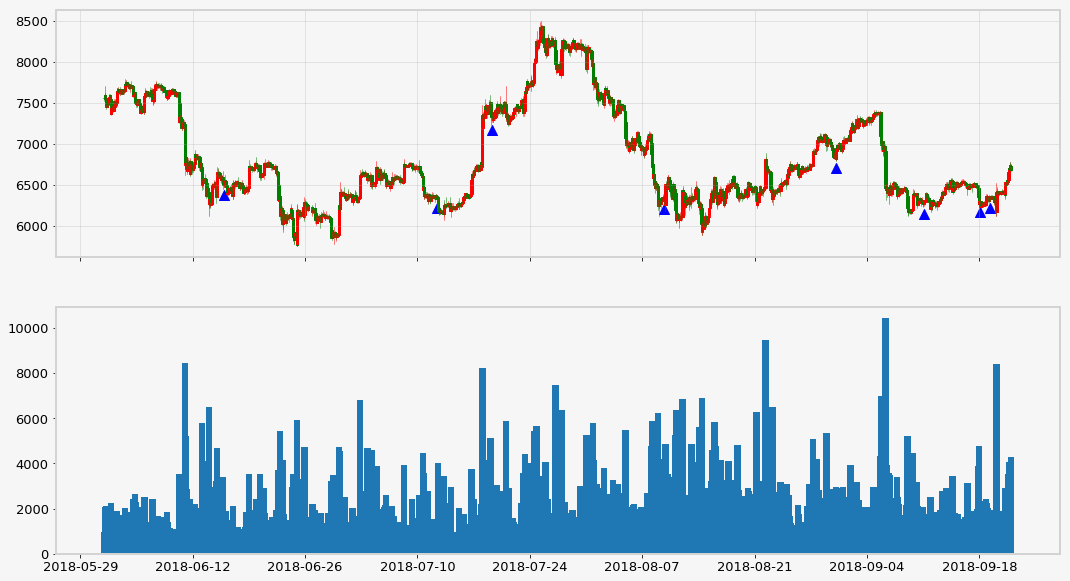

In [38]:
import matplotlib.pyplot as plt
import mpl_finance as mpf

def draw_candle(candle, scatterX, scatterY):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
    mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
    ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.xaxis_date ()
    ax1.bar(data1H.index, data1H.volume)
    plt.show()


from matplotlib.pylab import date2num
data1H = Time_dict['1H'].set_index('datetime')
data1H['candleTime'] = list(map(date2num, data1H.index))
candle = data1H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values

Morningstar_X = Morningstar[Morningstar['BTCUSDT:binance']==100].index
Morningstar_Y = data1H.loc[Morningstar_X,'low']-100

draw_candle(candle, Morningstar_X, Morningstar_Y)

# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


In [41]:
MA_j = dv1H.add_formula('MA_j', "Ts_Mean(close,5)",add_data=True)
MD_j = dv1H.add_formula('MD_j', 'StdDev(close,5)', add_data=True)
BollDown_j = dv1H.add_formula('BollDown_j', 'MA_j-2*MD_j',add_data=True)

Field [MA_j] is overwritten.
Field [MD_j] is overwritten.


In [52]:
MA_j = dv1H.add_formula('MA_j', "Ts_Mean(close,5)", add_data=True)
MD_j = dv1H.add_formula('MD_j', 'StdDev(close,5)', add_data=True)
BollUp_j = dv1H.add_formula('BollUp_j', 'MA_j+2*MD_j', add_data=True)

Field [MA_j] is overwritten.
Field [MD_j] is overwritten.


In [74]:
import matplotlib.pyplot as plt

def Plot_Mean(dv, signal1, signal2, signal3, chart_name='dv_Boll', ShortPeriod=5, LongPeriod=20, n=0):
    fig,ax = plt.subplots(1,1,sharex=True, figsize=(15,8))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax.plot(signal1.iloc[n:], alpha=0.5, label = 'Down')  # alpha is transparency
    ax.plot(signal2.iloc[n:], alpha=0.5, color = 'y', label = 'Up')
    ax.plot(signal3.iloc[n:], alpha=0.5, color = 'k', label = 'Mid')
    ax.legend(loc = 'best')
#     ax.plot(pd.Series(alpha.rolling(ShortPeriod).mean(), index=alpha.index).iloc[n:])
#     ax.plot(pd.Series(alpha.rolling(LongPeriod).mean(), index=alpha.index).iloc[n:])
#     plt.savefig(chart_name)
    plt.show()

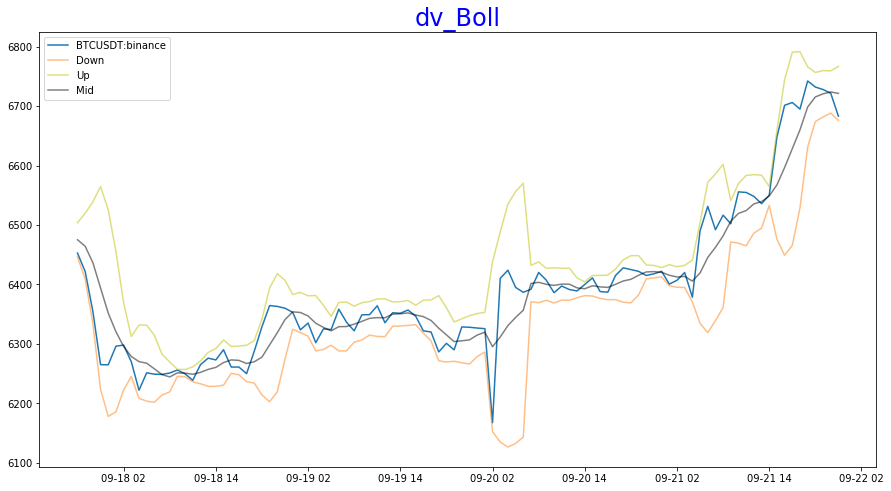

In [75]:
import pandas as pd
MA_j = dv1H.get_ts('MA_j', date_type='datetime')
# MD_j = dv1H.get_ts('MD_j', date_type='datetime')
BollDown_j = dv1H.get_ts('BollDown_j', date_type='datetime')
BollUp_j = dv1H.get_ts('BollUp_j', date_type='datetime')

Plot_Mean(dv1H, BollDown_j.iloc[:,0], BollUp_j.iloc[:, 0], MA_j.iloc[:, 0], n=-100)

## 研究报告
如上图所示，构造了三个因子：布林上轨线指标和布林下轨线指标

1. 布林线开口向上，只要股价K线始终运行在布林线的中轨上方的时候，说明股价一直处在一个中长期上升轨道之中，这是BOLL指标发出的持股待涨信号，这种信号更加准确。此时，投资者应坚决持股待涨。
2. 布林线开口向下，只要股价K线始终运行在布林线的中轨下方的时候，说明股价一直处在一个中长期下降轨道之中，这是BOLL指标发出的持币观望信号,这种信号更加准确。此时，投资者应坚决持币观望。

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

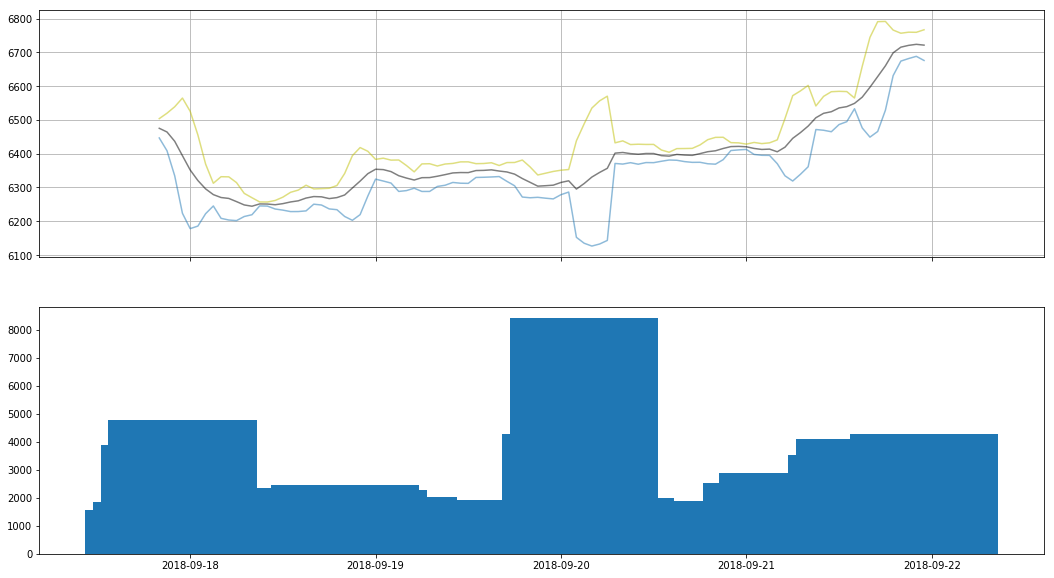

In [88]:
import mpl_finance as mpf

def draw_candle(signal1, signal2, signal3):
    fig, (ax, ax1) = plt.subplots(2,1,sharex=True, figsize=(18,10))
    ax.grid(True)
#     mpf.candlestick_ohlc(ax, candle, width=0.3, colorup='r', colordown='g',alpha=1.0)
#     ax.scatter(scatterX, scatterY, color='b', s=100, marker='^')
    ax.plot(signal1.iloc[-100:], alpha=0.5, label = 'Down')  # alpha is transparency
    ax.plot(signal2.iloc[-100:], alpha=0.5, color = 'y', label = 'Up')
    ax.plot(signal3.iloc[-100:], alpha=0.5, color = 'k', label = 'Mid')
    ax.xaxis_date ()
    ax1.bar(data1H.index[-100:], data1H.volume[-100:])
    plt.show()
    
from matplotlib.pylab import date2num
data1H = Time_dict['1H'].set_index('datetime')
data1H['candleTime'] = list(map(date2num, data1H.index))
# candle = data1H.reindex_axis(["candleTime", "open", "high", "low", "close"], 1).values
draw_candle(BollDown_j.iloc[:,0], BollUp_j.iloc[:, 0], MA_j.iloc[:, 0])

指标和交易量的联系：如上图是我放大到最近100天的数据，如果出现布林带和交易量都瘀滞不前，不温不火，一般股票处于观望状态。当有某一天交易量突然上升，此时布林带会有突然放宽，这指明了一波上涨趋势或下跌趋势的开始。还有一种情况是“量价齐升”，当交易量稳步上升，如上图，股价也稳步上升，说明投资者的热情渐长，股价会健康稳定地上涨。

进场信号：

1.价格向上穿上轨时将形成回档，为卖出时机，或者触碰上轨后开始调头向下，也是卖出时机。

2.价格向下穿下轨时将形成反弹，为买入时机，或者触碰下轨后开始调头向上，也是买入时机。

3.布林带的带宽非常狭窄时，也就是窄幅波动的时候，是行情即将选择突破方向的信号。投资者要等突破方向明确，布林带的带宽放大时再介入。

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来
